**Scikit-Learn程序包基础**

*Followed <Python数据科学手册>第5章 机器学习*

*创建时间：20210830*

# Scikit-Learn的数据表示

## 数据表

数据表通常以Pandas的DataFrame的形式表示，其中：
* ```行```对应一个```样本```，```行数```记为```n_samples```
* ```列```对应一个```特征```，```列数```记为```n_features```
* 数据表 = 特征矩阵 + 目标数组


In [1]:
# 加载seaborn程序包中的自带数据集iris，其统计了不同种类的花的4个参数
import seaborn as sns
iris = sns.load_dataset('iris') # Pandas的DataFrame格式
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 特征矩阵与目标数组
* 维度为```[n_samples, n_features]```表称为```特征矩阵```，简记为```X```
* 目标数组的特征就是我们希望从数据中预测的量化结果
* 目标数组一般是一维数组，长度是样本数```n_samples```，即维度[n_samples, 1]
* 目标数组也可以是2维[n_samples, n_targets]

/Users/rui/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


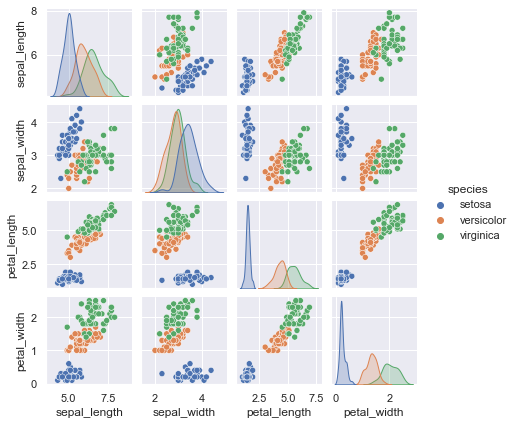

In [2]:
# 基于iris数据集，我们的目标就是根据4个参数来预测花的种类，因此，species就是目标数组
sns.set()
sns.pairplot(iris, hue='species', size=1.5)

## 抽取`特征矩阵`和`目标数组`

In [3]:
# 从数据表中抽取**特征矩阵**
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
X_iris.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# 从数据表中抽取**目标数组**
y_iris = iris['species']
print(y_iris.shape)
y_iris.head()

(150,)


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Scikit-Learn的评估器API
* Estimator翻译成评估器并不是很好，应翻译成估计器、预测器
* Scikit-Learn的所有机器学习算法都是通过评估器API实现的，它为各种机器学习应用提供了统一的接口
* 使用评估器的5个步骤：
    1. 选择模型类
    2. 配置模型超参数
    3. 整理数据（特征矩阵，目标数组）
    4. 拟合
    5. 应用（预测）

## 实例：有监督学习-->`简单线性回归`
* 其他线性模型（[``sklearn.linear_model`` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html)）

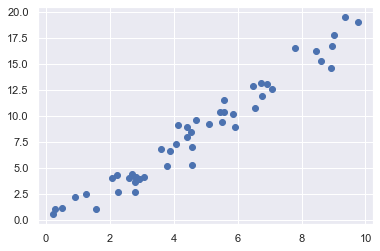

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 生成样本数据
rng = np.random.RandomState(3)
x = 10 * rng.rand(50) # 生成[0, 10]内50个随机数
y = 2 * x - 1 + rng.randn(50) # (0, 1)正态分布
plt.scatter(x, y)

slope:  [1.97257627]
intercept:  -0.9059303551423472


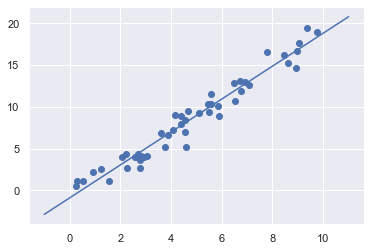

In [7]:
# * 建模步骤
# * 1.选择模型类（这里选择线性回归模型）
from sklearn.linear_model import LinearRegression

# * 2.配置模型超参数
model = LinearRegression(fit_intercept=True)

# * 3.将数据整理成特征矩阵和目标数组
X = x[:, np.newaxis]
#Y = y[:, np.newaxis]
## 目标数组是行向量或列向量都可以
# * 4.拟合
model.fit(X, y)
print("slope: ", model.coef_)
print("intercept: ", model.intercept_)

# * 5.预测
# 生成新数据
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)

## 实例：有监督学习-->`鸢尾花数据分类`

In [8]:
# 使用之前的鸢尾花数据集，已经分好了特征矩阵和目标数组
print("特征矩阵: \n", X_iris)
print("\n目标数组: \n", y_iris)

特征矩阵: 
      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

目标数组: 
 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [9]:
# 步骤
# * 1.选择模型类（高斯朴素贝叶斯方法）
from sklearn.naive_bayes import GaussianNB

# * 2.配置模型超参数（这里没有超参数，所以不用管）
model = GaussianNB()

# * 3.整理数据（特征矩阵和目标数组已经准备好，但是没有划分数据集和测试集）
# ^ 使用函数自动划分训练集和测试集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

# * 4.拟合
model.fit(Xtrain, ytrain)

# * 5.预测与评估
y_model = model.predict(Xtest)
# ^ 打分函数
from sklearn.metrics import accuracy_score
accuracy_score(y_model, ytest)


0.9736842105263158

## 实例：无监督学习-->`鸢尾花数据降维`
* 降维的任务是要找到一个可以保留数据本质特征的低维矩阵来表示高维数据
* 本实例使用`主成分分析(PCA)`方法，模型将返回2个主成分，用二维数据来表示鸢尾花的四维数据

/Users/rui/miniforge3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


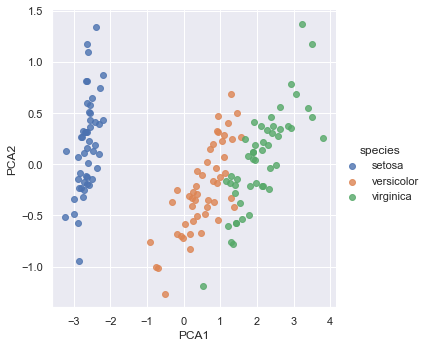

In [10]:
from sklearn.decomposition import PCA # ^ 1.模型选择
model = PCA(n_components=2)           # ^ 2.设置超参数
model.fit(X_iris)                     # ^ 3.拟合
X_2D = model.transform(X_iris)        # ^ 4.应用（将数据转换为2维）
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

## 实例：无监督学习-->`鸢尾花数据聚类`
* 聚类算法：对无标签数据集进行分组

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


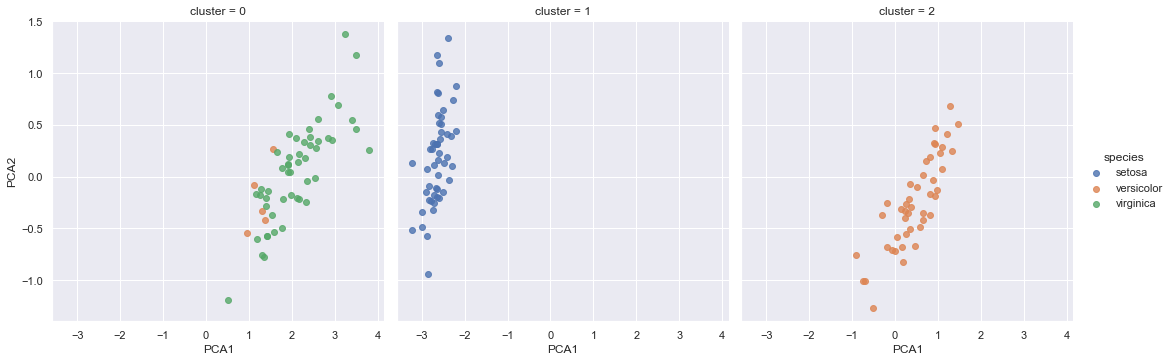

In [28]:
from sklearn.mixture import GaussianMixture as GMM # ^ 1.选择模型（高斯混合模型）
model = GMM(n_components=3, covariance_type='full')# ^ 2.设置超参数
model.fit(X_iris)                                  # ^ 3.拟合
y_gmm = model.predict(X_iris)                      # ^ 4.应用
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

# 大练习：手写数字识别